#### Speaker Change Detection Using F0 and MFCC Features with the IEMOCAP Dataset 
 
This is a Malay word prediction assignment, where given n previous Malay words (wordi+1 , 
wordi+2, wordi+n), you are required to predict wordn+1. Train a deep learning neural network to 
perform the task using the training and validation data. Evaluate the accuracy of your model 
using the test data.

Objectives<br>
O1: Construct natural language processing and deep learning components in problems 
involving prediction, classification and sequence modeling in text and speech. <br>
O2: Design solutions using natural language processing and deep learning techniques for 
problems in text and speech analytics. 

#### 1. Understanding the Dataset
• Task: Familiarize yourself with the IEMOCAP dataset, focusing on its dialog sessions, 
speaker labels, and audio features. 

#### 2. Feature Extraction 
• Task: Extract the following features for audio segmentation: <br>
    1. Fundamental Frequency (F0): Represents the pitch. <br>
    2. MFCC Features: Capture the spectral properties of speech.<br> <br>
• Use a sliding window (e.g., 20ms frames with 10ms overlap) for feature extraction.<br> 
• Tools: Use libraries like librosa or praat-parselmouth. <br>
• Deliverable: <br>
    - Python notebook scripts for feature extraction.<br> 
    - A visualization of the extracted features for a sample audio file (e.g., plot MFCCs and F0 over time). 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import parselmouth

# Load the Audio File   
audio_path = "IEMOCAP\IEMOCAP\Session1\dialog\wav\Ses01F_impro01.wav"
y, sr = librosa.load(audio_path, sr=None)

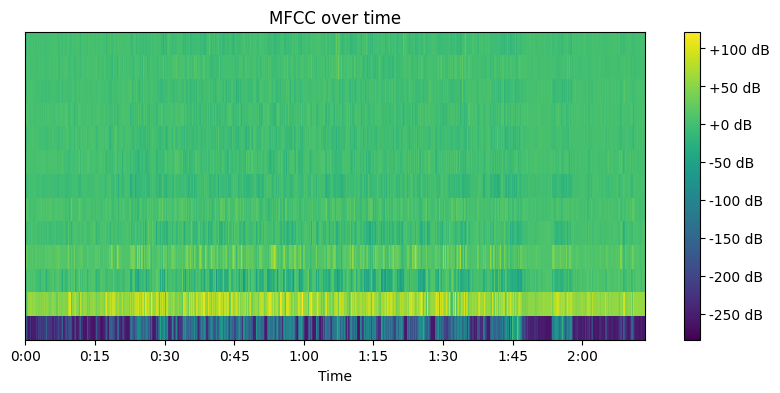

In [ ]:
# parameters
frame_length = int(0.02 * sr)  # 20ms
hop_length = int(0.01 * sr)    # 10ms
n_fft = 2048                   # FFT window length
n_mels = 40                    # Number of Mel bands
fmax = sr / 2                  # Max frequency

# extact mfcc Features
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels, fmax=fmax)

# Plot MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, sr=sr, hop_length=hop_length, x_axis='time', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC over time')
plt.show()

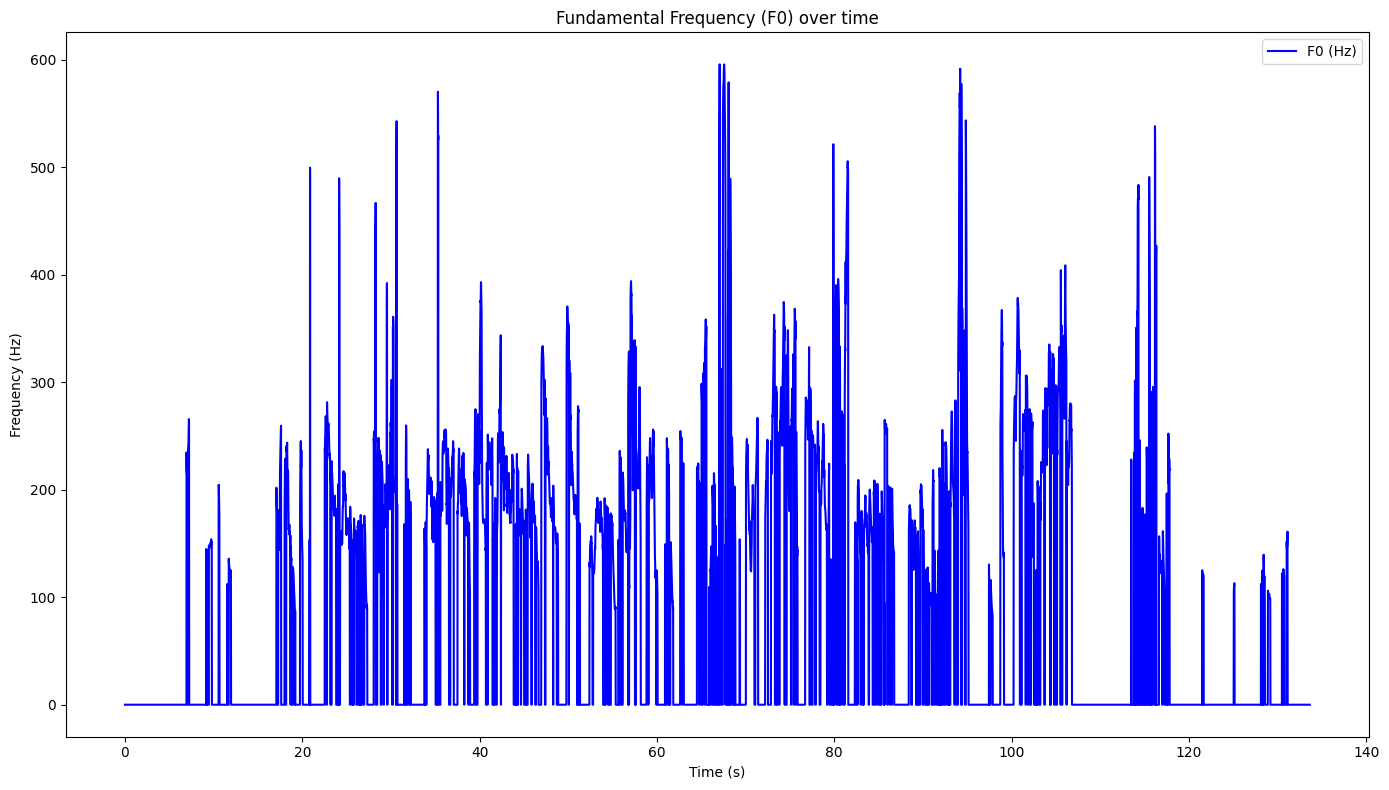

In [11]:
# Extract Fundamental Frequency (F0)
sound = parselmouth.Sound(audio_path)
pitch = sound.to_pitch(time_step=hop_length/sr)
f0_values = pitch.selected_array['frequency']

# Plot F0 over time
# Time axis for plotting
times = librosa.times_like(mfccs[0], sr=sr, hop_length=hop_length)

# debug (ensure f0_values and mfccs are the same size)
times = np.linspace(0, len(y)/sr, len(f0_values))

plt.figure(figsize=(14, 8))

# Plot F0
plt.plot(times, f0_values, label='F0 (Hz)', color='b')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Fundamental Frequency (F0) over time')
plt.legend()

plt.tight_layout()
plt.show()


[0. 0. 0. ... 0. 0. 0.]


### 3. Data Preprocessing 
• Task: <br>
o Label data for speaker changes (binary labels: 1 for change, 0 for no change). <br>
• Divide the data into train (session 1-3), validation (session 4), and test (session 5) sets.<br> 
• Deliverable:<br> 
o A Python notebook or script detailing preprocessing steps. 

In [5]:
# Code

### 4. Model Development 
• Task: <br>
o Train a machine learning model to classify speaker changes. <br>
o Experiment with different window sizes or time-lagged parameters for better 
performance. <br>
o Evaluate performance using metrics such as F1-score, precision, and recall.<br> 
• Deliverable: <br>
o Model training scripts.<br> 
o A summary of model architecture and parameters.<br> 
o Plots showing training and validation accuracy/loss curves.<br> 

In [6]:
# Code

### 5. Results and Discussion 
• Task: <br>
o Test the model on unseen data.<br> 
o Analyze the model with different window sizes and time-lagged parameters.<br> 
o Analyze model performance at detecting speaker change points, discussing
strengths and weaknesses. <br>
• Deliverable: <br>
o A brief report discussing results and suggestions for improvement. <br>

In [7]:
# Code